In [0]:
%python
df = spark.table("grades_csv")
df.show(5)  # Mostra as 5 primeiras linhas
df.printSchema()


+--------+----------+---------+-------------+----+--------+---------+
|aluno_id|nome_aluno|    curso|   disciplina|nota|semestre|   campus|
+--------+----------+---------+-------------+----+--------+---------+
|    null|nome_aluno|    curso|   disciplina|nota|semestre|   campus|
|       1|   Aluno 1|Curso 187|Disciplina 10|2.71|  2023-2| Campus 4|
|       2|   Aluno 2| Curso 84|Disciplina 37|2.41|  2023-1| Campus 6|
|       3|   Aluno 3|  Curso 7|Disciplina 32|7.86|  2023-1|Campus 17|
|       4|   Aluno 4| Curso 17|Disciplina 36|6.88|  2023-2|Campus 29|
+--------+----------+---------+-------------+----+--------+---------+
only showing top 5 rows

root
 |-- aluno_id: integer (nullable = true)
 |-- nome_aluno: string (nullable = true)
 |-- curso: string (nullable = true)
 |-- disciplina: string (nullable = true)
 |-- nota: string (nullable = true)
 |-- semestre: string (nullable = true)
 |-- campus: string (nullable = true)



In [0]:
%python
# 📦 Importando bibliotecas
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, rank, dense_rank, row_number
from pyspark.sql.window import Window
from pyspark.sql.types import IntegerType, FloatType

# 🚀 Iniciando a sessão Spark (caso ainda não tenha feito)
spark = SparkSession.builder.appName("Tratamento de Dados - Modelo Medalhão").getOrCreate()

# 🔹 1️⃣ Lendo a tabela original (bronze)
df_bronze = spark.table("grades_csv")

# 🔹 2️⃣ Tratamento inicial: substituindo nulos em aluno_id e nota
# Substituímos aluno_id nulo por -1 (ex: sem identificação)
# Nota nula por 0.0 (ex: sem nota registrada)
df_bronze = df_bronze.fillna({"aluno_id": -1, "nota": "0.0"})

# 🔹 3️⃣ Conversão de tipos: aluno_id (inteiro), nota (float)
df_bronze = df_bronze.withColumn("aluno_id", col("aluno_id").cast(IntegerType()))
df_bronze = df_bronze.withColumn("nota", col("nota").cast(FloatType()))

# 🔹 4️⃣ Criando a tabela silver: dados tratados, sem nulos importantes
# (Exemplo: removendo linhas onde nome_aluno, curso ou disciplina estão nulos)
df_silver = df_bronze.dropna(subset=["nome_aluno", "curso", "disciplina"])

# 🔹 5️⃣ Criando a tabela gold: rankeando por nota dentro de cada disciplina
# Usamos janela para rankear notas (do maior para o menor)
windowSpec = Window.partitionBy("disciplina").orderBy(col("nota").desc())

df_gold = df_silver.withColumn("rank", rank().over(windowSpec))

# 🔹 6️⃣ Exibindo resultados finais
print("🏅 Tabela Bronze:")
df_bronze.show()

print("🥈 Tabela Silver:")
df_silver.show()

print("🥇 Tabela Gold (com rank):")
df_gold.show()

# 🔹 7️⃣ Salvando as tabelas no catálogo do Databricks (opcional)
# df_bronze.write.mode("overwrite").saveAsTable("grades_bronze")
# df_silver.write.mode("overwrite").saveAsTable("grades_silver")
# df_gold.write.mode("overwrite").saveAsTable("grades_gold")

print("🚀 Modelo medalhão finalizado!")


🏅 Tabela Bronze:
+--------+----------+---------+-------------+----+--------+---------+
|aluno_id|nome_aluno|    curso|   disciplina|nota|semestre|   campus|
+--------+----------+---------+-------------+----+--------+---------+
|      -1|nome_aluno|    curso|   disciplina|null|semestre|   campus|
|       1|   Aluno 1|Curso 187|Disciplina 10|2.71|  2023-2| Campus 4|
|       2|   Aluno 2| Curso 84|Disciplina 37|2.41|  2023-1| Campus 6|
|       3|   Aluno 3|  Curso 7|Disciplina 32|7.86|  2023-1|Campus 17|
|       4|   Aluno 4| Curso 17|Disciplina 36|6.88|  2023-2|Campus 29|
|       5|   Aluno 5|Curso 147|Disciplina 11|2.96|  2023-1| Campus 1|
|       6|   Aluno 6| Curso 88| Disciplina 6|5.18|  2023-1|Campus 29|
|       7|   Aluno 7| Curso 54|Disciplina 16|7.99|  2023-2|Campus 14|
|       8|   Aluno 8|Curso 129|Disciplina 11|5.71|  2023-1|Campus 19|
|       9|   Aluno 9|Curso 161|Disciplina 15|7.97|  2023-1|Campus 29|
|      10|  Aluno 10| Curso 42|Disciplina 13|7.98|  2023-1| Campus 8|
|  

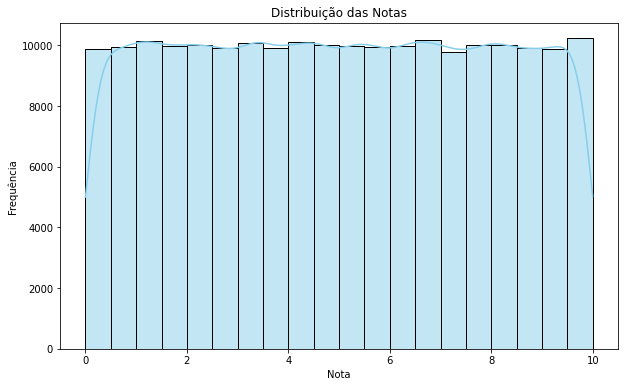

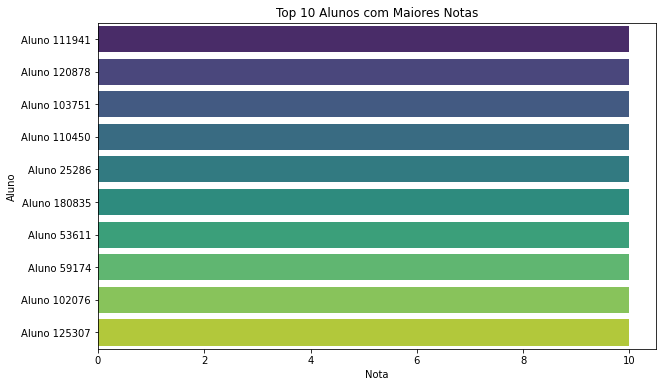

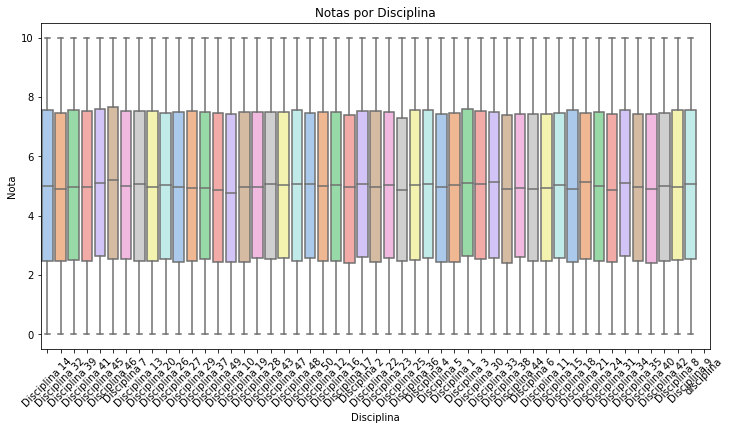

In [0]:
%python
import matplotlib.pyplot as plt
import seaborn as sns

# Convertendo para Pandas
df_gold_pd = df_gold.toPandas()

# 📊 Exemplo 1: Distribuição das notas
plt.figure(figsize=(10, 6))
sns.histplot(df_gold_pd["nota"], bins=20, kde=True, color="skyblue")
plt.title("Distribuição das Notas")
plt.xlabel("Nota")
plt.ylabel("Frequência")
plt.show()

# 📊 Exemplo 2: Top 10 alunos com maiores notas (independente da disciplina)
top10 = df_gold_pd.sort_values(by="nota", ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x="nota", y="nome_aluno", data=top10, palette="viridis")
plt.title("Top 10 Alunos com Maiores Notas")
plt.xlabel("Nota")
plt.ylabel("Aluno")
plt.show()

# 📊 Exemplo 3: Boxplot de notas por disciplina
plt.figure(figsize=(12, 6))
sns.boxplot(x="disciplina", y="nota", data=df_gold_pd, palette="pastel")
plt.title("Notas por Disciplina")
plt.xlabel("Disciplina")
plt.ylabel("Nota")
plt.xticks(rotation=45)
plt.show()


In [0]:
%python
#--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [0]:
%python
df = spark.table("payments_csv")
df.show(5)  # Mostra as 5 primeiras linhas
df.printSchema()

+--------+--------------+--------------+---------------+-----------+--------------+---------------+
|aluno_id|mes_referencia|data_pagamento|valor_pagamento|valor_multa|valor_desconto|data_vencimento|
+--------+--------------+--------------+---------------+-----------+--------------+---------------+
|    null|mes_referencia|data_pagamento|valor_pagamento|valor_multa|valor_desconto|data_vencimento|
|       1|       2023-07|    2020-12-01|        1005.48|      28.77|        179.83|     2023-12-18|
|       2|       2023-05|    2021-12-20|         576.68|      35.05|         26.55|     2020-08-15|
|       3|       2023-12|    2018-04-18|         791.41|      24.37|        101.76|     2020-02-23|
|       4|       2023-01|    2018-12-23|         710.98|      35.11|         45.12|     2023-10-12|
+--------+--------------+--------------+---------------+-----------+--------------+---------------+
only showing top 5 rows

root
 |-- aluno_id: integer (nullable = true)
 |-- mes_referencia: string (

In [0]:
%python
# 📦 Importando bibliotecas
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, rank, dense_rank, row_number
from pyspark.sql.window import Window
from pyspark.sql.types import IntegerType, FloatType, DateType

# 🚀 Iniciando a sessão Spark (caso ainda não tenha feito)
spark = SparkSession.builder.appName("Tratamento de Pagamentos - Modelo Medalhão").getOrCreate()

# 🔹 1️⃣ Lendo a tabela de pagamentos (bronze)
df_pagamentos_bronze = spark.table("payments_csv")

# 🔹 2️⃣ Tratamento inicial: substituindo nulos em aluno_id e valores de pagamento
# Substituindo aluno_id nulo por -1 e valores financeiros nulos por 0.0
df_pagamentos_bronze = df_pagamentos_bronze.fillna({
    "aluno_id": -1,
    "valor_pagamento": "0.0",
    "valor_multa": "0.0",
    "valor_desconto": "0.0"
})

# 🔹 3️⃣ Conversão de tipos
df_pagamentos_bronze = df_pagamentos_bronze.withColumn("aluno_id", col("aluno_id").cast(IntegerType()))
df_pagamentos_bronze = df_pagamentos_bronze.withColumn("valor_pagamento", col("valor_pagamento").cast(FloatType()))
df_pagamentos_bronze = df_pagamentos_bronze.withColumn("valor_multa", col("valor_multa").cast(FloatType()))
df_pagamentos_bronze = df_pagamentos_bronze.withColumn("valor_desconto", col("valor_desconto").cast(FloatType()))
df_pagamentos_bronze = df_pagamentos_bronze.withColumn("data_pagamento", col("data_pagamento").cast(DateType()))
df_pagamentos_bronze = df_pagamentos_bronze.withColumn("data_vencimento", col("data_vencimento").cast(DateType()))

# 🔹 4️⃣ Criando a tabela silver: dados tratados, removendo linhas onde aluno_id ou mes_referencia estejam nulos
df_pagamentos_silver = df_pagamentos_bronze.dropna(subset=["aluno_id", "mes_referencia"])

# 🔹 5️⃣ Criando a tabela gold: rankeamento dos pagamentos por maior valor
# Usamos janela para rankear por aluno_id e mes_referencia
windowSpec = Window.partitionBy("mes_referencia").orderBy(col("valor_pagamento").desc())

df_pagamentos_gold = df_pagamentos_silver.withColumn("rank", rank().over(windowSpec))

# 🔹 6️⃣ Exibindo resultados
print("🏅 Tabela Bronze:")
df_pagamentos_bronze.show()

print("🥈 Tabela Silver:")
df_pagamentos_silver.show()

print("🥇 Tabela Gold (com rank):")
df_pagamentos_gold.show()

# 🔹 7️⃣ Salvando as tabelas no catálogo do Databricks (opcional)
# df_pagamentos_bronze.write.mode("overwrite").saveAsTable("pagamentos_bronze")
# df_pagamentos_silver.write.mode("overwrite").saveAsTable("pagamentos_silver")
# df_pagamentos_gold.write.mode("overwrite").saveAsTable("pagamentos_gold")

print("🚀 Tratamento de pagamentos concluído!")


🏅 Tabela Bronze:
+--------+--------------+--------------+---------------+-----------+--------------+---------------+
|aluno_id|mes_referencia|data_pagamento|valor_pagamento|valor_multa|valor_desconto|data_vencimento|
+--------+--------------+--------------+---------------+-----------+--------------+---------------+
|      -1|mes_referencia|          null|           null|       null|          null|           null|
|       1|       2023-07|    2020-12-01|        1005.48|      28.77|        179.83|     2023-12-18|
|       2|       2023-05|    2021-12-20|         576.68|      35.05|         26.55|     2020-08-15|
|       3|       2023-12|    2018-04-18|         791.41|      24.37|        101.76|     2020-02-23|
|       4|       2023-01|    2018-12-23|         710.98|      35.11|         45.12|     2023-10-12|
|       5|       2023-11|    2022-04-01|         530.07|      39.84|         40.27|     2022-07-08|
|       6|       2023-02|    2018-06-07|        1430.24|      22.99|        112.37|

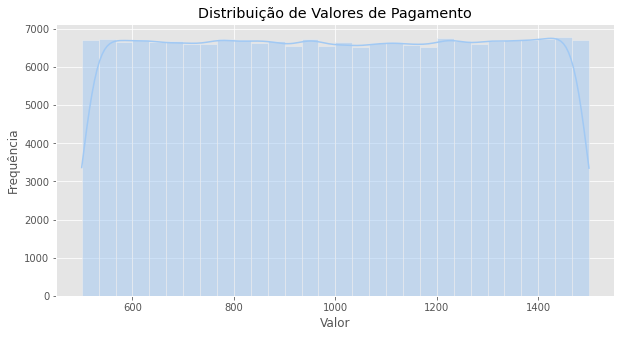

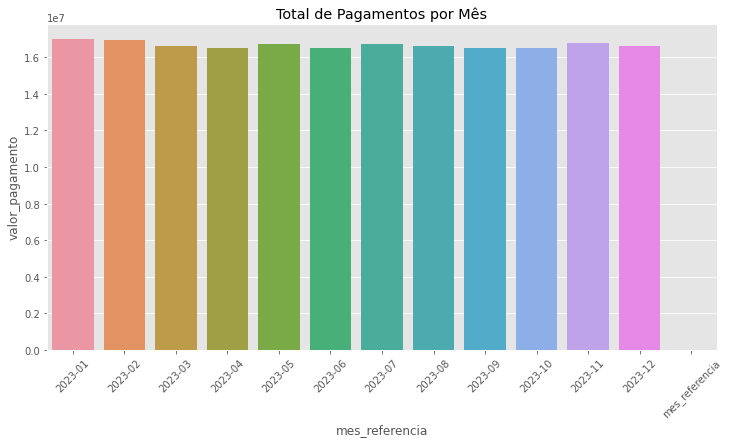

In [0]:
%python
# Versão mais simples focada nos gráficos essenciais
try:
    # Converter apenas as colunas necessárias para os gráficos
    plot_data = df_pagamentos_silver.select(
        "valor_pagamento", 
        "valor_multa", 
        "valor_desconto", 
        "mes_referencia",
        "data_pagamento"
    ).toPandas()
    
    # Converter datas
    plot_data['data_pagamento'] = pd.to_datetime(plot_data['data_pagamento'])
    plot_data['mes_pagamento'] = plot_data['data_pagamento'].dt.to_period('M')
    
    # 1. Gráfico de distribuição de pagamentos
    plt.figure(figsize=(10, 5))
    sns.histplot(plot_data['valor_pagamento'], bins=30, kde=True)
    plt.title('Distribuição de Valores de Pagamento')
    plt.xlabel('Valor')
    plt.ylabel('Frequência')
    plt.show()
    
    # 2. Pagamentos por mês de referência
    plt.figure(figsize=(12, 6))
    monthly = plot_data.groupby('mes_referencia')['valor_pagamento'].sum().reset_index()
    sns.barplot(x='mes_referencia', y='valor_pagamento', data=monthly)
    plt.title('Total de Pagamentos por Mês')
    plt.xticks(rotation=45)
    plt.show()
    
except Exception as e:
    print(f"Erro ao gerar gráficos: {str(e)}")
    print("Verifique os tipos de dados no DataFrame Spark")





In [0]:
%python
#--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [0]:
%python
df = spark.table("students_updated_csv")
df.show(5)  # Mostra as 5 primeiras linhas
df.printSchema()

+--------------+---------------+-----------+------------+--------------+---------------------+---------+--------+-------------+
|data_matricula|curso_matricula|curso_atual|status_aluno|data_conclusao|data_ultima_alteracao|   campus|aluno_id|   nome_aluno|
+--------------+---------------+-----------+------------+--------------+---------------------+---------+--------+-------------+
|data_matricula|curso_matricula|curso_atual|status_aluno|data_conclusao| data_ultima_alter...|   campus|aluno_id|   nome_aluno|
|    2018-04-18|       Curso 74|  Curso 127|    abandono|          null|           2022-09-17|Campus 14|ID000001| Randy Wilson|
|    2020-12-28|      Curso 119|  Curso 177|    trancado|          null|           2022-02-07|Campus 24|ID000002|Cheryl Romero|
|    2023-10-06|       Curso 90|   Curso 95|   concluído|    2023-01-02|           2023-07-14| Campus 2|ID000003| Larry Burton|
|    2021-02-12|      Curso 195|    Curso 6|    trancado|          null|           2020-03-10|Campus 25|

In [0]:
%python
# 📦 Importando bibliotecas
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, rank, sum as _sum, when, datediff
from pyspark.sql.window import Window
from pyspark.sql.types import IntegerType, FloatType, DateType, StringType

# 🚀 Iniciando a sessão Spark
spark = SparkSession.builder.appName("Tratamento de Pagamentos - Modelo Medalhão V2").getOrCreate()

# 🔹 1️⃣ Lendo a tabela de pagamentos (bronze)
df_pagamentos_bronze = spark.table("payments_csv")

# 🔹 2️⃣ Tratamento inicial: substituindo nulos
df_pagamentos_bronze = df_pagamentos_bronze.fillna({
    "aluno_id": -1,
    "valor_pagamento": "0.0",
    "valor_multa": "0.0",
    "valor_desconto": "0.0",
    "mes_referencia": "N/A",
    "data_pagamento": "1900-01-01",
    "data_vencimento": "1900-01-01"
})

# 🔹 3️⃣ Conversão de tipos com tratamento de erros
df_pagamentos_bronze = df_pagamentos_bronze.withColumn(
    "aluno_id", 
    when(col("aluno_id").cast(IntegerType()).isNotNull(), col("aluno_id").cast(IntegerType()))
    .otherwise(-1)
)

# Função para conversão segura de valores monetários
def safe_float_cast(column):
    return when(col(column).rlike("^\\d+(\\.\\d+)?$"), col(column).cast(FloatType()))\
           .otherwise(0.0)

df_pagamentos_bronze = df_pagamentos_bronze.withColumn("valor_pagamento", safe_float_cast("valor_pagamento"))
df_pagamentos_bronze = df_pagamentos_bronze.withColumn("valor_multa", safe_float_cast("valor_multa"))
df_pagamentos_bronze = df_pagamentos_bronze.withColumn("valor_desconto", safe_float_cast("valor_desconto"))

# Conversão de datas com tratamento de erros
df_pagamentos_bronze = df_pagamentos_bronze.withColumn(
    "data_pagamento", 
    when(col("data_pagamento").cast(DateType()).isNotNull(), col("data_pagamento").cast(DateType()))
    .otherwise(None)
)

df_pagamentos_bronze = df_pagamentos_bronze.withColumn(
    "data_vencimento", 
    when(col("data_vencimento").cast(DateType()).isNotNull(), col("data_vencimento").cast(DateType()))
    .otherwise(None)
)

# 🔹 4️⃣ Criando a tabela silver
df_pagamentos_silver = df_pagamentos_bronze.filter(
    (col("aluno_id") != -1) & 
    (col("mes_referencia") != "N/A") &
    (col("data_pagamento").isNotNull())
)

# Adicionando colunas calculadas
df_pagamentos_silver = df_pagamentos_silver.withColumn(
    "dias_atraso",
    when(col("data_pagamento") > col("data_vencimento"),
    datediff(col("data_pagamento"), col("data_vencimento")))
    .otherwise(0)
)

df_pagamentos_silver = df_pagamentos_silver.withColumn(
    "valor_liquido",
    col("valor_pagamento") + col("valor_multa") - col("valor_desconto")
)

# 🔹 5️⃣ Criando a tabela gold
# Janela para rankear pagamentos por aluno
window_aluno = Window.partitionBy("aluno_id").orderBy(col("valor_pagamento").desc())

# Janela para análise mensal
window_mes = Window.partitionBy("mes_referencia").orderBy(col("valor_liquido").desc())

df_pagamentos_gold = df_pagamentos_silver.withColumn("rank_por_aluno", rank().over(window_aluno))\
                                        .withColumn("rank_por_mes", rank().over(window_mes))\
                                        .withColumn("total_mensal", _sum("valor_liquido").over(window_mes))

# 🔹 6️⃣ Exibindo resultados
print("🏅 Tabela Bronze (5 primeiras linhas):")
df_pagamentos_bronze.show(5, truncate=False)

print("\n📊 Estatísticas Bronze:")
df_pagamentos_bronze.select(
    _sum(when(col("aluno_id") == -1, 1).otherwise(0)).alias("ids_invalidos"),
    _sum(when(col("valor_pagamento") == 0.0, 1).otherwise(0)).alias("pagamentos_zerados"),
    _sum(when(col("mes_referencia") == "N/A", 1).otherwise(0)).alias("meses_invalidos")
).show()

print("\n🥈 Tabela Silver (5 primeiras linhas):")
df_pagamentos_silver.show(5, truncate=False)

print("\n📈 Estatísticas Silver:")
df_pagamentos_silver.select(
    _sum("valor_pagamento").alias("total_pagamentos"),
    _sum("valor_multa").alias("total_multas"),
    _sum("valor_desconto").alias("total_descontos"),
    _sum("valor_liquido").alias("total_liquido")
).show()

print("\n🥇 Tabela Gold (Top 5 pagamentos por mês):")
df_pagamentos_gold.filter(col("rank_por_mes") <= 5)\
                 .select("mes_referencia", "aluno_id", "valor_liquido", "rank_por_mes")\
                 .orderBy("mes_referencia", "rank_por_mes")\
                 .show(truncate=False)

# 🔹 7️⃣ Salvando as tabelas (opcional)
# df_pagamentos_bronze.write.mode("overwrite").saveAsTable("pagamentos_bronze_v2")
# df_pagamentos_silver.write.mode("overwrite").saveAsTable("pagamentos_silver_v2")
# df_pagamentos_gold.write.mode("overwrite").saveAsTable("pagamentos_gold_v2")

print("\n🚀 Tratamento de pagamentos concluído com sucesso!")

🏅 Tabela Bronze (5 primeiras linhas):
+--------+--------------+--------------+-----------------+------------------+------------------+---------------+
|aluno_id|mes_referencia|data_pagamento|valor_pagamento  |valor_multa       |valor_desconto    |data_vencimento|
+--------+--------------+--------------+-----------------+------------------+------------------+---------------+
|-1      |mes_referencia|null          |0.0              |0.0               |0.0               |null           |
|1       |2023-07       |2020-12-01    |1005.47998046875 |28.770000457763672|179.8300018310547 |2023-12-18     |
|2       |2023-05       |2021-12-20    |576.6799926757812|35.04999923706055 |26.549999237060547|2020-08-15     |
|3       |2023-12       |2018-04-18    |791.4099731445312|24.3700008392334  |101.76000213623047|2020-02-23     |
|4       |2023-01       |2018-12-23    |710.97998046875  |35.11000061035156 |45.119998931884766|2023-10-12     |
+--------+--------------+--------------+-----------------+

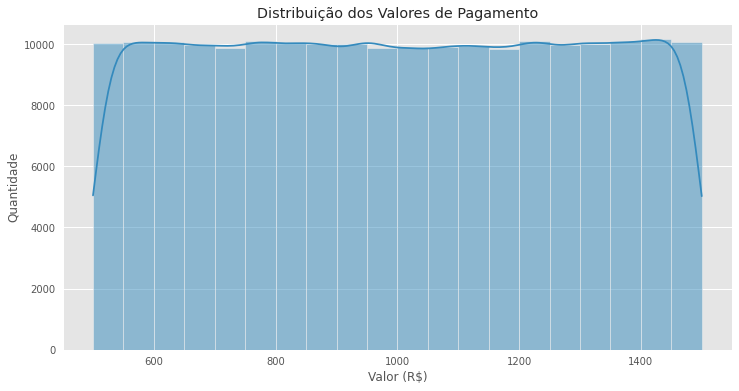

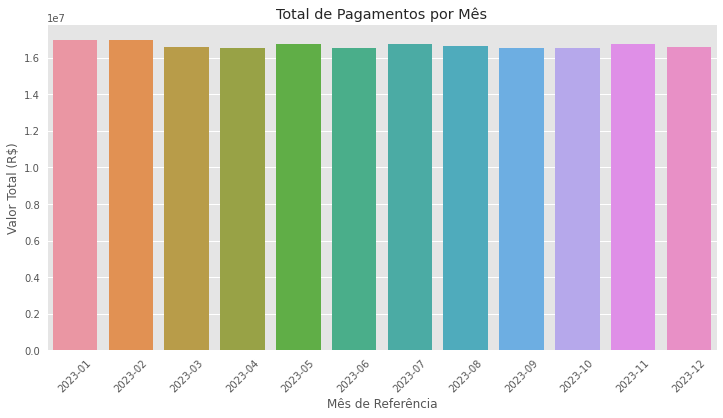

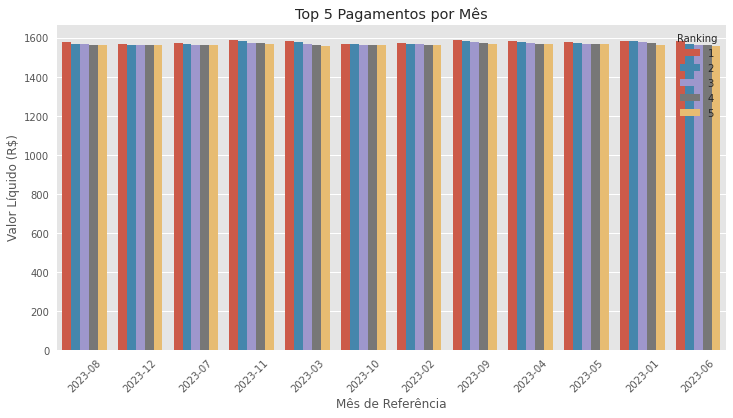

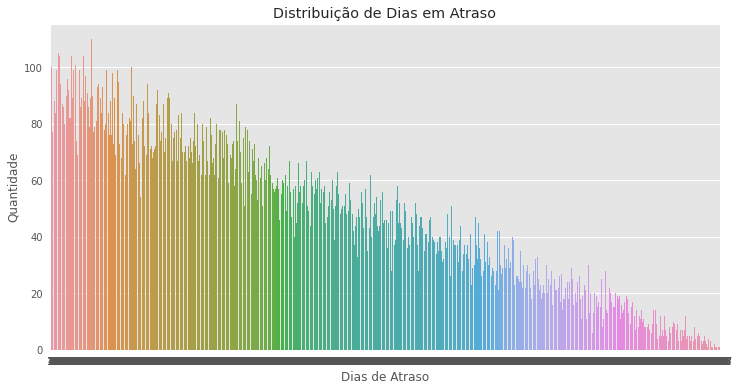

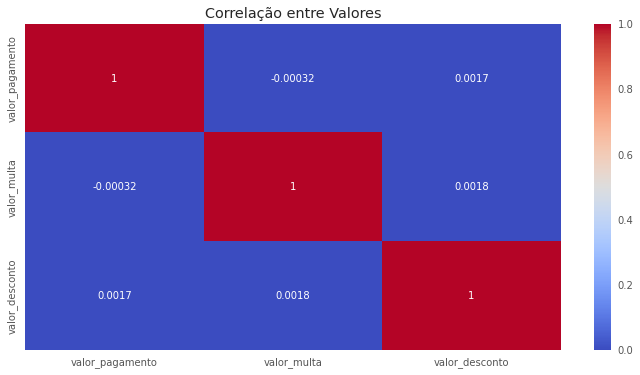

Gráficos gerados com sucesso!


In [0]:
%python
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Configuração básica dos gráficos
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 6)

# 1. Converter os DataFrames para Pandas (apenas se não estiverem vazios)
try:
    df_silver = df_pagamentos_silver.toPandas()
    df_gold = df_pagamentos_gold.toPandas()
except:
    print("Erro ao converter dados. Verifique os DataFrames.")
    exit()

# 2. Gráfico de Valores de Pagamento
plt.figure()
sns.histplot(df_silver['valor_pagamento'], bins=20, kde=True)
plt.title('Distribuição dos Valores de Pagamento')
plt.xlabel('Valor (R$)')
plt.ylabel('Quantidade')
plt.show()

# 3. Gráfico de Pagamentos por Mês
plt.figure()
pagamentos_por_mes = df_silver.groupby('mes_referencia')['valor_pagamento'].sum().reset_index()
sns.barplot(x='mes_referencia', y='valor_pagamento', data=pagamentos_por_mes)
plt.title('Total de Pagamentos por Mês')
plt.xlabel('Mês de Referência')
plt.ylabel('Valor Total (R$)')
plt.xticks(rotation=45)
plt.show()

# 4. Gráfico dos Top 5 Pagamentos por Mês (Gold)
if not df_gold.empty:
    plt.figure()
    top_pagamentos = df_gold[df_gold['rank_por_mes'] <= 5]
    sns.barplot(x='mes_referencia', y='valor_liquido', hue='rank_por_mes', data=top_pagamentos)
    plt.title('Top 5 Pagamentos por Mês')
    plt.xlabel('Mês de Referência')
    plt.ylabel('Valor Líquido (R$)')
    plt.legend(title='Ranking')
    plt.xticks(rotation=45)
    plt.show()

# 5. Gráfico de Dias em Atraso
if 'dias_atraso' in df_silver.columns:
    plt.figure()
    sns.countplot(x='dias_atraso', data=df_silver[df_silver['dias_atraso'] > 0])
    plt.title('Distribuição de Dias em Atraso')
    plt.xlabel('Dias de Atraso')
    plt.ylabel('Quantidade')
    plt.show()

# 6. Gráfico Simples de Correlação
if not df_silver.empty:
    plt.figure()
    sns.heatmap(df_silver[['valor_pagamento', 'valor_multa', 'valor_desconto']].corr(), 
                annot=True, cmap='coolwarm')
    plt.title('Correlação entre Valores')
    plt.show()

print("Gráficos gerados com sucesso!")